# Survival rate Montreal businesses

## Import libraries

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import category_encoders as ce

## Data Import

In [96]:
df = pd.read_csv('informe_les_commercants.csv')

In [97]:
df.head(5)

,ID Réponse,Date,Phase,Type de territoire,Arrondissement / Ville liée,Statut du commerce,Enjeux: Soutien financier?,Enjeux: Maintien des opérations?,Enjeux: Fiscalité (taxes et impôts)?,Enjeux: Ressources humaines?,...,Présence sur LinkedIn?,Faites-vous de la vente en ligne?,Canal de vente en ligne,Connaissez-vous le service de livraison urbaine?,Êtes-vous intéressé par le service de livraison urbaine?,Intérêt pour le programme d'accompagnement pour le virage numérique des entreprises?,Offrez-vous un service de livraison?,Êtes-vous satisfait de votre service de livraison actuel?,Seriez-vous intéressé par le service de livraison urbain (à vélo) mise en place par la Ville de Montréal et ses partenaires si vous si aviez accès?,Est-ce que l'information que nous vous avons donnée vous a été utile?
0,1,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Ouvert,NaN,Oui,NaN,Oui,...,NaN,Non,Pas de vente en ligne,Sans réponse,Sans réponse,"Non, je n'ai pas d'intérêt à faire un virage n...",Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Non
1,2,2020-05-12,1,Arrondissement,Outremont,Partiellement ouvert,Oui,NaN,NaN,NaN,...,NaN,Non,Pas de vente en ligne,Non,Oui,"Non, je n'ai pas d'intérêt à faire un virage n...",Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui
2,3,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Ouvert,NaN,NaN,NaN,Oui,...,NaN,Oui,Site transactionnel,Oui,Non,"Non, j'ai déjà ce qu'il me faut pour faire un ...",Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui
3,4,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Fermé,Oui,NaN,NaN,NaN,...,NaN,Non,Pas de vente en ligne,Oui,Non,Je ne sais pas,Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui
4,5,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Statut inconnu,Oui,Oui,NaN,NaN,...,NaN,Oui,Site transactionnel,Non,Oui,Oui,Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui


In [98]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 32 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                               --------------  ----- 
 0   ID Réponse                                                                                                                                           1896 non-null   int64 
 1   Date                                                                                                                                                 1896 non-null   object
 2   Phase                                                                                                                                                1896 non-null   int64 
 3   Typ

## Data Cleaning

### Rename columns & variables selection

In [99]:
# Rename columns
rename = {"Arrondissement / Ville liée": "Location", "Statut du commerce": "Operation_status", 
         "Enjeux: Soutien financier?": "Challenge_financial_support", 
         "Enjeux: Maintien des opérations?": "Challenge_maintain_ops", 
         "Enjeux: Fiscalité (taxes et impôts)?": "Challenge_taxes", 
         "Enjeux: Ressources humaines?": "Challenge_HR", 
         "Enjeux: Réglementation?": "Challenge_regulation", 
         "Enjeux: Marketing?": "Challenge_marketing", 
         "Enjeux: Santé et sécurité?": "Challenge_security_health", 
         "Enjeux: Recherche d'équipement sanitaire?": "Challenge_sanitary_equip", 
         "Enjeux: Aménagement de l'espace?": "Challenge_space_management", 
         "Enjeux: Permis pour les terrasses extérieures?": "Challenge_terasse_permit", 
         "Enjeux: Autre?": "Other_challenges", 
         "Présence sur les médias sociaux?": "Social_media_pressence",
          "Présence sur Facebook?" : "Facebook", 
          "Présence sur Twitter?": "Twitter", 
          "Présence sur Instagram?": "Instagram", 
          "Présence sur LinkedIn?": "Linkedin", 
          "Faites-vous de la vente en ligne?": "Online_businesses", 
          "Canal de vente en ligne": "Channel_online_business", 
          "Offrez-vous un service de livraison?": "Delivery_service_offer", 
          "Êtes-vous satisfait de votre service de livraison actuel?": "Satisfaction_current_delivery_service"
         }

df = df.rename(columns = rename)

In [100]:
# Preliminary variables selection: Remove variables not relevant to the analysis
drop_columns = ['ID Réponse', 'Type de territoire', "Intérêt pour le programme d'aide d'urgence?", 
               'Connaissez-vous le service de livraison urbaine?', 'Êtes-vous intéressé par le service de livraison urbaine?',
               "Intérêt pour le programme d'accompagnement pour le virage numérique des entreprises?", 
               'Seriez-vous intéressé par le service de livraison urbain (à vélo) mise en place par la Ville de Montréal et ses partenaires si vous si aviez accès?', 
               "Est-ce que l'information que nous vous avons donnée vous a été utile?"]

In [101]:
df = df.drop(drop_columns, axis=1)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Date                                   1896 non-null   object
 1   Phase                                  1896 non-null   int64 
 2   Location                               1347 non-null   object
 3   Operation_status                       1896 non-null   object
 4   Challenge_financial_support            928 non-null    object
 5   Challenge_maintain_ops                 167 non-null    object
 6   Challenge_taxes                        89 non-null     object
 7   Challenge_HR                           149 non-null    object
 8   Challenge_regulation                   82 non-null     object
 9   Challenge_marketing                    266 non-null    object
 10  Challenge_security_health              236 non-null    object
 11  Challenge_sanitar

### Date column transformation

In [103]:
def string_to_date(row):
    row['Date'] = datetime.strptime(row['Date'], '%Y-%m-%d')
    return row

df = df.apply(string_to_date, axis=1)

### Missing data

In [104]:
for i in df.columns: 
    if df[i].count() < 1896:
        print(i)
        print(df[i].unique())

Location
['Le Plateau-Mont-Royal' 'Outremont' 'Côte-des-Neiges-Notre-Dame-de-Grâce'
 'Ahuntsic-Cartierville' 'Rosemont-La Petite-Patrie'
 'Villeray-Saint-Michel-Parc-Extension' 'Verdun' nan 'Le Sud-Ouest'
 'Westmount' 'Mont-Royal' 'Saint-Laurent' 'Montréal-Nord' 'Saint-Léonard'
 'Rivière-des-Prairies-Pointe-aux-Trembles' 'Ville-Marie'
 'Mercier-Hochelaga-Maisonneuve' 'Kirkland' 'Pierrefonds-Roxboro'
 'LaSalle' 'Dollard-des-Ormeaux' 'Anjou' 'Pointe-Claire' 'Montréal-Ouest'
 'Beaconsfield' 'Dorval' "L'Île-Bizard-Sainte-Geneviève" 'Lachine'
 'Île-Bizard-Sainte-Geneviève']
Challenge_financial_support
[nan 'Oui']
Challenge_maintain_ops
['Oui' nan]
Challenge_taxes
[nan 'Oui']
Challenge_HR
['Oui' nan]
Challenge_regulation
[nan 'Oui']
Challenge_marketing
[nan 'Oui']
Challenge_security_health
[nan 'Oui']
Challenge_sanitary_equip
[nan 'Oui']
Challenge_space_management
[nan 'Oui']
Challenge_terasse_permit
[nan 'Oui']
Other_challenges
['Oui' nan]
Facebook
[nan 'Oui']
Twitter
[nan 'Oui']
Instagram


Noted that Location has 28% missing values. In addition, the missing values in other columns marked as 'nan' are considered "No" answer as the unique values of the columns is "Oui" (Yes) and 'nan'. 

Proposed solution: 
- Location is a critical variable in the analysis. Retain the dataset with missing values, and retain the data set with missing values in the Location variable removed for analysis. 
- All other columns with 'nan' values will be regarded as 'No' in answer.

In [105]:
nan_columns=['Challenge_financial_support', 'Challenge_maintain_ops', 
                        'Challenge_taxes', 'Challenge_HR', 'Challenge_regulation', 
                        'Challenge_marketing', 'Challenge_security_health', 
                        'Challenge_sanitary_equip', 'Challenge_space_management',
                        'Challenge_terasse_permit', 'Other_challenges','Facebook', 'Twitter',
                        'Instagram', 'Linkedin']
nan_dict = {i: 'No' for i in nan_columns}
df = df.fillna(value=nan_dict)

In [136]:
# Drop Unknown status from Operation_status
df = df.drop(df[df['Operation_status'] == "Statut inconnu"].index)

In [106]:
df_with_loc = df.copy()
df_drop_loc = df.copy().drop(columns=['Location'])

## Data Exploration

<Axes: xlabel='Phase', ylabel='Count'>

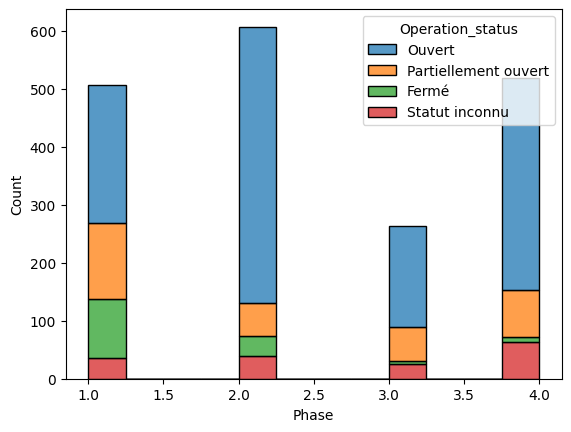

In [107]:
sns.histplot(df_with_loc, x='Phase', hue='Operation_status', multiple='stack')

<Axes: xlabel='Date'>

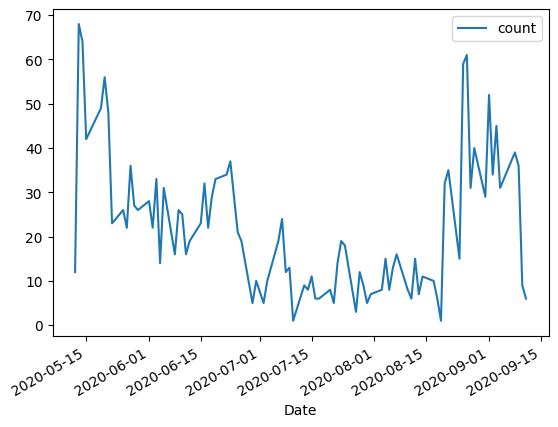

In [108]:
# Understanding the data collection frequency
date_count = pd.DataFrame(df_with_loc.value_counts('Date')).reset_index()
date_count.sort_values('Date').reset_index(drop=True)
date_count.plot(x='Date', y='count')

<Axes: xlabel='Date', ylabel='Count'>

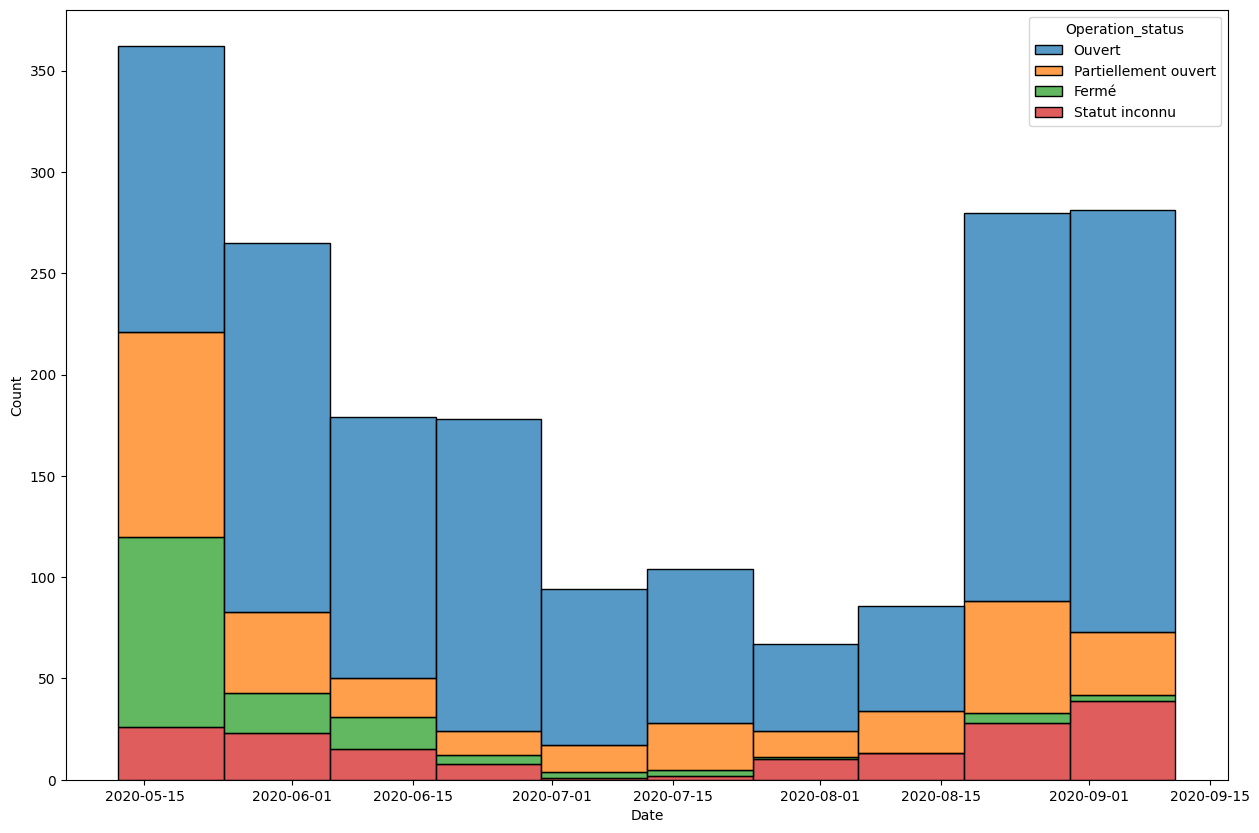

In [109]:
# Status of operations by date
plt.figure(figsize=(15,10))
sns.histplot(data=df_with_loc, x='Date', hue='Operation_status', multiple='stack', bins=10)

In [110]:
operation_status = df_with_loc.groupby(by=['Operation_status']).count().reset_index()

<Axes: xlabel='Operation_status'>

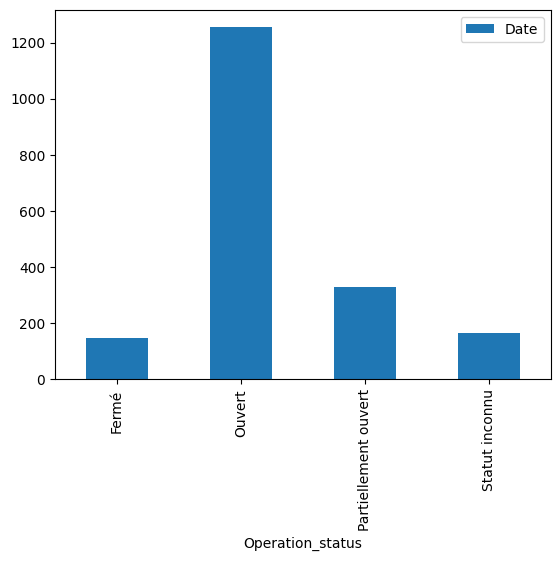

In [111]:
# Operation status
operation_status.plot(x='Operation_status', y='Date', kind='bar')

<Axes: xlabel='Location'>

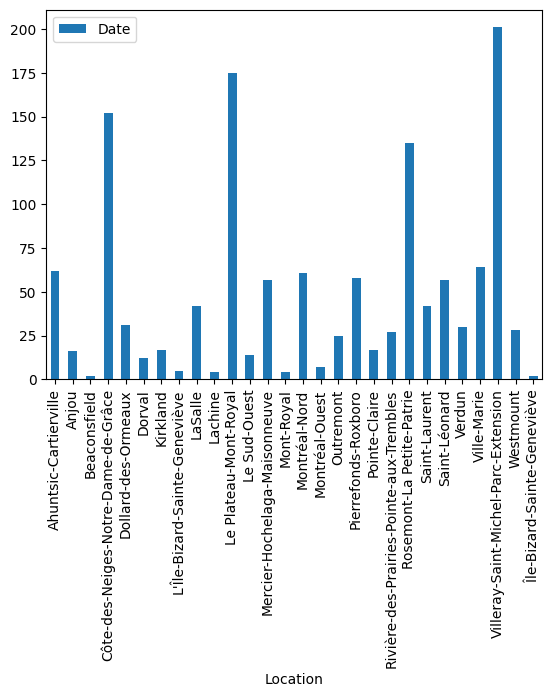

In [112]:
# Counts by location
location_count = df_with_loc.groupby(by=['Location']).count().reset_index()
location_count.plot(x='Location', y='Date', kind='bar')

<Figure size 1500x1500 with 0 Axes>

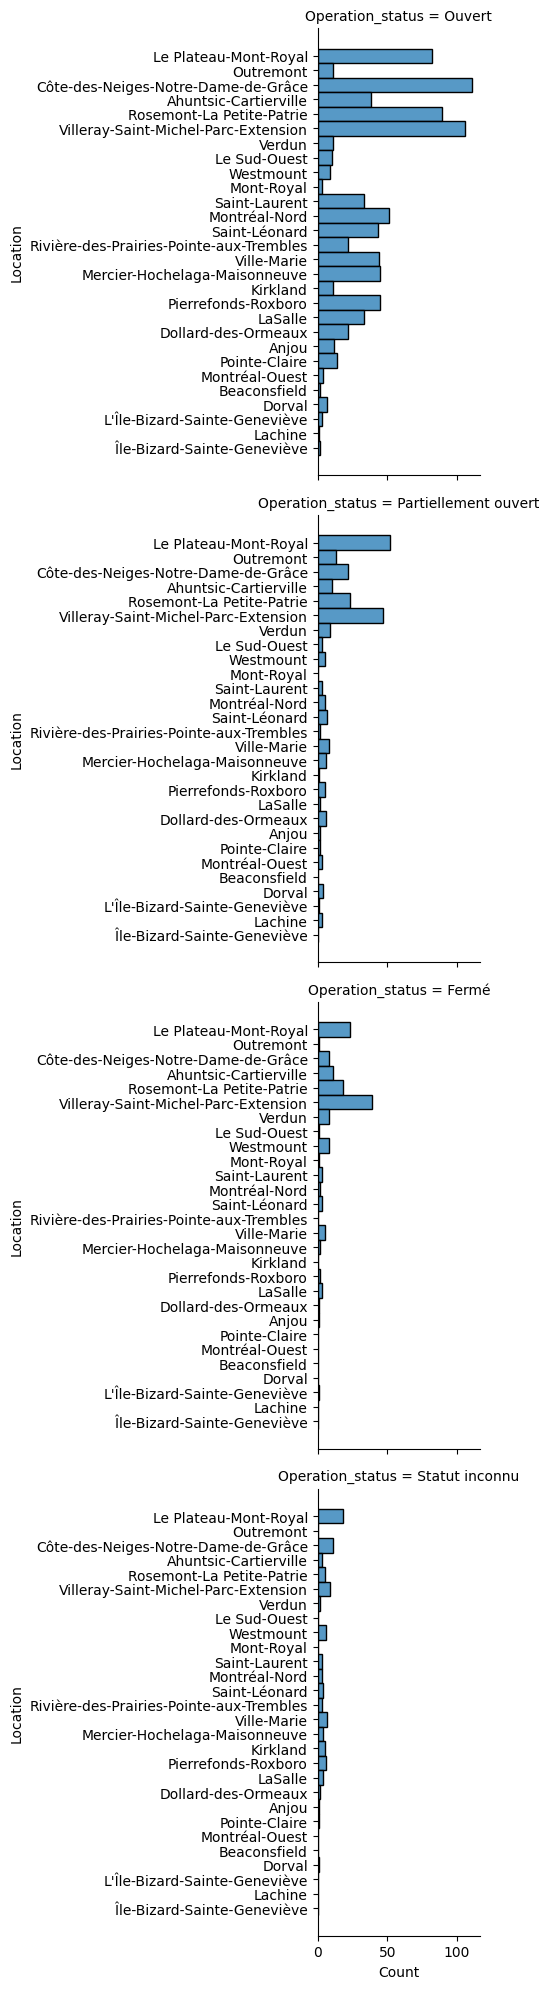

In [113]:
plt.figure(figsize=(15,15))
sns.displot(df_with_loc, y='Location', row='Operation_status')

## Data transformation

### Encoding

Data transformation for qualitative variables

In [114]:
df_with_loc.columns

Index(['Date', 'Phase', 'Location', 'Operation_status',
       'Challenge_financial_support', 'Challenge_maintain_ops',
       'Challenge_taxes', 'Challenge_HR', 'Challenge_regulation',
       'Challenge_marketing', 'Challenge_security_health',
       'Challenge_sanitary_equip', 'Challenge_space_management',
       'Challenge_terasse_permit', 'Other_challenges',
       'Social_media_pressence', 'Facebook', 'Twitter', 'Instagram',
       'Linkedin', 'Online_businesses', 'Channel_online_business',
       'Delivery_service_offer', 'Satisfaction_current_delivery_service'],
      dtype='object')

In [115]:
df_with_loc.head(2)

,Date,Phase,Location,Operation_status,Challenge_financial_support,Challenge_maintain_ops,Challenge_taxes,Challenge_HR,Challenge_regulation,Challenge_marketing,...,Other_challenges,Social_media_pressence,Facebook,Twitter,Instagram,Linkedin,Online_businesses,Channel_online_business,Delivery_service_offer,Satisfaction_current_delivery_service
0,2020-05-12,1,Le Plateau-Mont-Royal,Ouvert,No,Oui,No,Oui,No,No,...,Oui,Non,No,No,No,No,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel
1,2020-05-12,1,Outremont,Partiellement ouvert,Oui,No,No,No,No,No,...,No,Non,No,No,No,No,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel


#### Binary encoding

In [116]:
# Selection of variables for different types of encoding
binary_encoding_cols = ['Challenge_financial_support', "Challenge_maintain_ops", "Challenge_taxes",
                    "Challenge_HR", "Challenge_regulation", "Challenge_marketing", "Challenge_security_health", 
                    "Challenge_sanitary_equip", "Challenge_space_management", "Challenge_terasse_permit", "Other_challenges", 
                    "Social_media_pressence", "Facebook", "Twitter", "Instagram", "Linkedin"]

In [117]:
# Encoding
df_with_loc = pd.get_dummies(data=df_with_loc, columns=binary_encoding_cols, drop_first=True)
df_drop_loc = pd.get_dummies(data=df_drop_loc, columns=binary_encoding_cols, drop_first=True)

In [118]:
df_with_loc.head(5)

,Date,Phase,Location,Operation_status,Online_businesses,Channel_online_business,Delivery_service_offer,Satisfaction_current_delivery_service,Challenge_financial_support_Oui,Challenge_maintain_ops_Oui,...,Challenge_sanitary_equip_Oui,Challenge_space_management_Oui,Challenge_terasse_permit_Oui,Other_challenges_Oui,Social_media_pressence_Oui,Social_media_pressence_Sans réponse,Facebook_Oui,Twitter_Oui,Instagram_Oui,Linkedin_Oui
0,2020-05-12,1,Le Plateau-Mont-Royal,Ouvert,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel,False,True,...,False,False,False,True,False,False,False,False,False,False
1,2020-05-12,1,Outremont,Partiellement ouvert,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-05-12,1,Le Plateau-Mont-Royal,Ouvert,Oui,Site transactionnel,Question non posée lors de l'appel,Question non posée lors de l'appel,False,False,...,True,False,False,True,True,False,True,False,True,False
3,2020-05-12,1,Le Plateau-Mont-Royal,Fermé,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2020-05-12,1,Le Plateau-Mont-Royal,Statut inconnu,Oui,Site transactionnel,Question non posée lors de l'appel,Question non posée lors de l'appel,True,True,...,True,False,False,False,True,False,True,False,True,False


#### Ordinal encoding

Additional variables required to be encoded - Ordinal encoding: Operation_status, Online_businesses, channel_online_business, delivery_service_offer, satisfaction_current_delivery_service

The ordinal encoding follows the following category: 
- Not applicable, no response, question not posed: 0 
- Closed, No: 1
- Open, Yes: higher. Noted that if the service available before covid, then higher ranking. In addition, higher category for businesses invest in standardized provider (un tiers). 

In [119]:
status_dict = {
              'Fermé':0, 
              'Partiellement ouvert':1, 
              'Ouvert':2}
df_with_loc['Operation_status'] = df_with_loc['Operation_status'].map(status_dict)
df_drop_loc['Operation_status'] = df_drop_loc['Operation_status'].map(status_dict)

In [120]:
online_business_dict = {"Réponse inconnue":0,'Non applicable':0, 
                       'Non':1, 
                       'Oui':2}
df_with_loc['Online_businesses'] = df_with_loc['Online_businesses'].map(online_business_dict)
df_drop_loc['Online_businesses'] = df_drop_loc['Online_businesses'].map(online_business_dict)

In [121]:
online_channel_dict = {'Non applicable':0, 'Réponse inconnue':0, 
                      'Pas de vente en ligne':1, 
                      "Oui, à l'aide d'un système maison, mais seulement depuis la crise":2,
                      'Système maison, disponible avant la crise':3,
                      'Site transactionnel':4, 
                      'Via un tiers (ex. : Amazon, Wayfair, Uber Eats, etc.)':5}

df_with_loc['Channel_online_business'] = df_with_loc['Channel_online_business'].map(online_channel_dict)
df_drop_loc['Channel_online_business'] = df_drop_loc['Channel_online_business'].map(online_channel_dict)

In [122]:
delivery_service_dict = {"Question non posée lors de l'appel":0, 'Non applicable':0,
                        'Sans réponse':0, 
                         'Non':1,
                         'Oui (service maison)':2, 
                        'Oui (via un tiers)':3}
df_with_loc['Delivery_service_offer'] = df_with_loc['Delivery_service_offer'].map(delivery_service_dict)
df_drop_loc['Delivery_service_offer'] = df_drop_loc['Delivery_service_offer'].map(delivery_service_dict)

In [123]:
satisfaction_dict = {"Question non posée lors de l'appel":0, 'Non applicable':0, 
                     'Sans réponse':0, 
                     'Insatisfait':1, 
                     'Moyennement satisfait':2, 
                    'Satisfait':3}
df_with_loc['Satisfaction_current_delivery_service'] = df_with_loc['Satisfaction_current_delivery_service'].map(satisfaction_dict)
df_drop_loc['Satisfaction_current_delivery_service'] = df_drop_loc['Satisfaction_current_delivery_service'].map(satisfaction_dict)

#### High cardinality variable encoding

Additional predictor to be encoded: Location. 
Location variable is a nominal categorical variable with 29 unique levels (locations). Noted that there are 24 other predictors to be used in the model. 

From this, one-hot encoding would not be used due to potential performance issues from increased dimensionality. 
The following considerations were taken regarding the variable: 
- Variable is a categorical and nominal data
- Variable has larger than 15 cardinality
- Consideration of 24 other variables, possible memory issues
- Purpose of the project is interpretability, thus not acceptable for information loss
- Overfitting considerations
- Considerations that not all locations have high data availability, possible categorical outliers.

The following encoding methods will be considered: LeaveOneOut encoding, Target encoding

In addition, data splitting into train and test set is performed. 

In [124]:
# Separate target variable
y = df_with_loc['Operation_status']

In [125]:
# Data splitting
x_train_loc, x_test_loc, y_train_loc, y_test_loc = train_test_split(df_with_loc, y, test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(df_drop_loc, y, test_size=0.3 )

In [126]:
# Target encoding: train and test set
train_target_encoding = x_train_loc.groupby(['Location'])['Operation_status'].mean().to_dict()
x_train_loc['loc_target_encoded'] =x_train_loc['Location'].map(train_target_encoding)

test_target_encoding = x_test_loc.groupby(['Location'])['Operation_status'].mean().to_dict()
x_test_loc['loc_target_encoded'] = x_test_loc['Location'].map(test_target_encoding)

In [127]:
# Drop target variable from x_train and x_test set
x_train_loc = x_train_loc.drop(['Operation_status'], axis=1)
x_train = x_train.drop(['Operation_status'], axis=1)

# Create duplicated Location column
x_train_loc['location_org'] = x_train_loc.loc[:, 'Location']
x_test_loc['location_org'] = x_test_loc.loc[:, 'Location']

In [128]:
# Leave One out encoding: Train set
encoder = ce.LeaveOneOutEncoder(cols=['Location'])
encoder.fit(x_train_loc, y_train_loc)
x_train_loc = encoder.transform(x_train_loc, y_train_loc)

In [129]:
# Leave one out encoding: Test set
encoder.fit(x_test_loc, y_test_loc)
x_test_loc = encoder.transform(x_test_loc, y_test_loc)

In [130]:
# Rename the location column
x_train_loc = x_train_loc.rename(columns ={"Location": "loc_LOO_encoded"})
x_test_loc = x_test_loc.rename(columns ={"Location": "loc_LOO_encoded"})

## Deliverables

### Relationship between qualitative variables

### Classification

The following model will be assessed: 
1. Location not included: x_train, x_test, y_train, y_test
    

2. Location included: x_train_loc, x_test_loc, y_train_loc, y_test loc 
- Target encoder
- Leave One Out encoder

### Logistic regression

In [140]:
# Adjust the ordinal categorical variable in y_train and y_test
binary_status = {0:0 ,1:1, 2:1}
y_train['Operation_status'] = y_train['Operation_status'].map(binary_status)


KeyError: 'Operation_status'

### LDA

### QDA